#  TIME SERIES ANALYSIS OF RETAIL SALES IN NEW ZEALAND

Welcome to my time series forecasting project, inspired by the practical insights gained from the book "Time Series Forecasting in Python", written by Marco Peixeiro. Here, I apply the knowledge acquired from the book to predict retail sales trends in New Zealand over the next two years.

## PROJECT DATASET

**Quarterly Retail Sales in New Zealand**: This dataset, managed by Stats NZ, New Zealand's official data agency, tracks quarterly retail sales in the country. The numbers, expressed in millions and at current prices, cover 114 data points from 1995 to 2023. It includes various businesses like supermarkets, department stores, clothing & footwear retailing, electronic goods retailing, pharmaceutical retailing, fuel retailing, accommodation, food and beverage services, among others.
To access the dataset, visit the Stats NZ webpage and navigate to the 'Retail Trade (ANZSIC06) - RTT' group. Look for the 'Sales and stocks by industry, in current and constant prices (SAFC)' table, updated quarterly in March, June, September, and December

## IMPORT LIBRARIES

Section description: in this section we import the main libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ETS decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Import the ADF Fuller test from statsmodels
from statsmodels.tsa.stattools import adfuller

# Import product
from itertools import product

# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Interactive plot with plotly
import plotly.express as px

# creates a progress bar
from tqdm.notebook import tqdm

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
# Import the ADF Fuller test from statsmodels
# from statsmodels.tsa.stattools import adfuller

In [4]:
# Import product
# from itertools import product

In [5]:
# SARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
# Interactive plot with plotly
# import plotly.express as px

In [7]:
# creates a progress bar
# from tqdm.notebook import tqdm

In [8]:
# Ljung-Box test
# from statsmodels.stats.diagnostic import acorr_ljungbox

## LOAD THE DATA

Section description: in this section we load the data and perform basic exploration.

In [9]:
df_retail = pd.read_csv('/content/retail trade sales and stocks.csv')


Explore the data

In [10]:
#Inspect the first 10 rows of the dataframe
df_retail.head(10)

,"Sales and stocks by industry, in current and constant prices (SAFC) (Qrtly-Mar/Jun/Sep/Dec)",Unnamed: 1,Unnamed: 2
0,NaN,All industries total,NaN
1,,Sales (operating income),Total stocks
2,,Current,Current
3,,Actual,Actual
4,1995Q3,8781.8,3245.6
5,1995Q4,9843.1,3428.2
6,1996Q1,9110.1,3442.7
7,1996Q2,9095.0,3438.1
8,1996Q3,9015.4,3378.9
9,1996Q4,10091.7,3423.0


In [11]:
#Inspect the last rows of the dataframe
df_retail.tail(33)
# Note that row -30 is the last with relevant information

,"Sales and stocks by industry, in current and constant prices (SAFC) (Qrtly-Mar/Jun/Sep/Dec)",Unnamed: 1,Unnamed: 2
112,2022Q3,28980.2,9420.1
113,2022Q4,32689.4,9813.7
114,2023Q1,29762.7,9759.1
115,2023Q2,29253.9,9357.6
116,Table information:,NaN,NaN
117,Units:,NaN,NaN
118,"$, Magnitude = Millions",NaN,NaN
119,NaN,NaN,NaN
120,Footnotes:,NaN,NaN
121,,NaN,NaN


In [12]:
df_retail.iloc[4:-29]

,"Sales and stocks by industry, in current and constant prices (SAFC) (Qrtly-Mar/Jun/Sep/Dec)",Unnamed: 1,Unnamed: 2
4,1995Q3,8781.8,3245.6
5,1995Q4,9843.1,3428.2
6,1996Q1,9110.1,3442.7
7,1996Q2,9095.0,3438.1
8,1996Q3,9015.4,3378.9
...,...,...,...
111,2022Q2,28529.4,9283.0
112,2022Q3,28980.2,9420.1
113,2022Q4,32689.4,9813.7
114,2023Q1,29762.7,9759.1


In [13]:
# Check the last 2 rows
df_retail.iloc[-31:-29]

,"Sales and stocks by industry, in current and constant prices (SAFC) (Qrtly-Mar/Jun/Sep/Dec)",Unnamed: 1,Unnamed: 2
114,2023Q1,29762.7,9759.1
115,2023Q2,29253.9,9357.6


In [14]:
df_retail.columns[0:2]

Index(['Sales and stocks by industry, in current and constant prices (SAFC) (Qrtly-Mar/Jun/Sep/Dec)', 'Unnamed: 1'], dtype='object')

## DATA PREPROCESSING

Section description: in this section we perform data cleaning and preprocessing.

Main tasks done:


*   Define a DataFrame with relevant data.
*   Rename columns.
*   Convert the date column into datetime object.
*   Set the datetime object frequency.
*   Set the datetime object as the index.




In [15]:
# Define a DataFrame with the data relevant for the analysis.
df_sales = df_retail[df_retail.columns[0:2]].iloc[4:-29]

In [16]:
df_sales

,"Sales and stocks by industry, in current and constant prices (SAFC) (Qrtly-Mar/Jun/Sep/Dec)",Unnamed: 1
4,1995Q3,8781.8
5,1995Q4,9843.1
6,1996Q1,9110.1
7,1996Q2,9095.0
8,1996Q3,9015.4
...,...,...
111,2022Q2,28529.4
112,2022Q3,28980.2
113,2022Q4,32689.4
114,2023Q1,29762.7


In [17]:
# Rename columns
df_sales.columns = ['Date','Quarterly_Sales']

In [18]:
df_sales.head()

,Date,Quarterly_Sales
4,1995Q3,8781.8
5,1995Q4,9843.1
6,1996Q1,9110.1
7,1996Q2,9095.0
8,1996Q3,9015.4


Why frequency is important?
Time-Based Operations: Setting a datetime object and its frequency is essential when performing time-based operations, such as calculating returns,
moving averages, or detecting patterns in the data. Having a consistent frequency helps ensure accurate results.

In [19]:
# Convert the 'Date' column to datetime with quarterly frequency
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%YQ%m')

In [20]:
df_sales.tail(10)

,Date,Quarterly_Sales
106,2021-01-01,26320.8
107,2021-02-01,27482.0
108,2021-03-01,25107.3
109,2021-04-01,31001.5
110,2022-01-01,28434.3
111,2022-02-01,28529.4
112,2022-03-01,28980.2
113,2022-04-01,32689.4
114,2023-01-01,29762.7
115,2023-02-01,29253.9


In [21]:
# Set the 'Q' column as the index
df_sales.set_index('Date', inplace=True)

In [22]:
df_sales

,Quarterly_Sales
Date,
1995-03-01,8781.8
1995-04-01,9843.1
1996-01-01,9110.1
1996-02-01,9095.0
1996-03-01,9015.4
...,...
2022-02-01,28529.4
2022-03-01,28980.2
2022-04-01,32689.4


In [23]:
df_sales.index

DatetimeIndex(['1995-03-01', '1995-04-01', '1996-01-01', '1996-02-01',
               '1996-03-01', '1996-04-01', '1997-01-01', '1997-02-01',
               '1997-03-01', '1997-04-01',
               ...
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Date', length=112, freq=None)

In [24]:
# Create a copy before set freq
df1 = df_sales.copy()

In [25]:
# Set the frequency of the time series to quarterly
df1.index = pd.date_range(start=df1.index.min(), periods=len(df1), freq='Q')

In [26]:
# Note that when setting frequency the last 2 rows ('2023-03-31','2023-06-30) are missing because it's not a complete year
df1.tail()

,Quarterly_Sales
2021-12-31,28529.4
2022-03-31,28980.2
2022-06-30,32689.4
2022-09-30,29762.7
2022-12-31,29253.9


In [27]:
# Identify the missing the missing values to add
df_sales.iloc[-2:]

,Quarterly_Sales
Date,
2023-01-01,29762.7
2023-02-01,29253.9


In [28]:
# Create a dataframe with the missing values, the last 2 rows (quarters)
df_q23 = df_sales.iloc[-2:]

In [29]:
# Note this new df has no frequency defined (freq=None).
df_q23.index

DatetimeIndex(['2023-01-01', '2023-02-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [30]:
# Create a date range with quarterly frequency
quarterly_date_range2 = pd.date_range(start=df_q23.index.min(), periods=len(df_q23), freq='Q')

In [31]:
quarterly_date_range2

DatetimeIndex(['2023-03-31', '2023-06-30'], dtype='datetime64[ns]', freq='Q-DEC')

In [32]:
# Set the index frequency to quarterly date range
df_q23.index = quarterly_date_range2

In [33]:
# Index freq it's now define
df_q23.index

DatetimeIndex(['2023-03-31', '2023-06-30'], dtype='datetime64[ns]', freq='Q-DEC')

In [34]:
# Rename the index
df_q23 = df_q23.rename_axis('Date')

In [35]:
df_q23

,Quarterly_Sales
Date,
2023-03-31,29762.7
2023-06-30,29253.9


In [36]:
# Concatenate the dataframes and sort it
df2 = pd.concat([df_q23, df1]).sort_index()

In [37]:
df2.index

DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30', '1996-09-30', '1996-12-31',
               '1997-03-31', '1997-06-30',
               ...
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30'],
              dtype='datetime64[ns]', length=114, freq=None)

In [38]:
# Set quarterly frequency
df2.index.freq = 'Q'

In [39]:
df2.tail()

,Quarterly_Sales
2022-06-30,32689.4
2022-09-30,29762.7
2022-12-31,29253.9
2023-03-31,29762.7
2023-06-30,29253.9


In [40]:
df2.index

DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30', '1996-09-30', '1996-12-31',
               '1997-03-31', '1997-06-30',
               ...
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30'],
              dtype='datetime64[ns]', length=114, freq='Q-DEC')

In [41]:
# Rename the index
df2.index.name = 'Date'

In [42]:
# Convert the 'Quarterly_Sales' column to float
df2['Quarterly_Sales'] = df2['Quarterly_Sales'].astype(float)

In [43]:
# Check
df2['Quarterly_Sales']

Date
1995-03-31     8781.8
1995-06-30     9843.1
1995-09-30     9110.1
1995-12-31     9095.0
1996-03-31     9015.4
               ...   
2022-06-30    32689.4
2022-09-30    29762.7
2022-12-31    29253.9
2023-03-31    29762.7
2023-06-30    29253.9
Freq: Q-DEC, Name: Quarterly_Sales, Length: 114, dtype: float64

## INSPECT AND VISUALIZATION

Section description: In this section we inspect features of the data and perform some visualizations.

In [44]:
df2.head()

,Quarterly_Sales
Date,
1995-03-31,8781.8
1995-06-30,9843.1
1995-09-30,9110.1
1995-12-31,9095.0
1996-03-31,9015.4


In [45]:
df2.tail()

,Quarterly_Sales
Date,
2022-06-30,32689.4
2022-09-30,29762.7
2022-12-31,29253.9
2023-03-31,29762.7
2023-06-30,29253.9


In [46]:
# Info method show a summary of the df
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1995-03-31 to 2023-06-30
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Quarterly_Sales  114 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


The following graphs show an upward trend in quarterly sales and a seasonal pattern. The drop in sales during the beginning of the pandemic is also notable.

<Axes: xlabel='Date'>

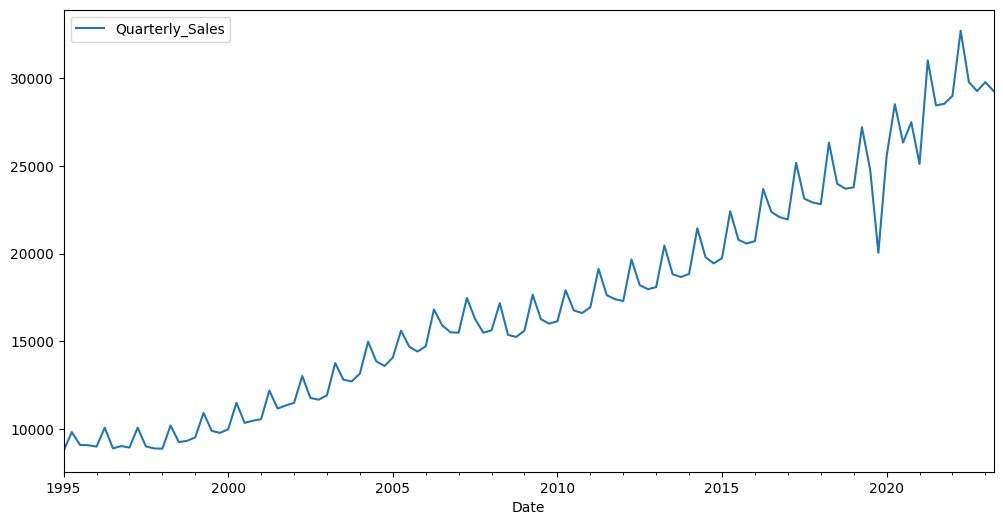

In [47]:
df2.plot(figsize=(12,6))

<Axes: xlabel='Date'>

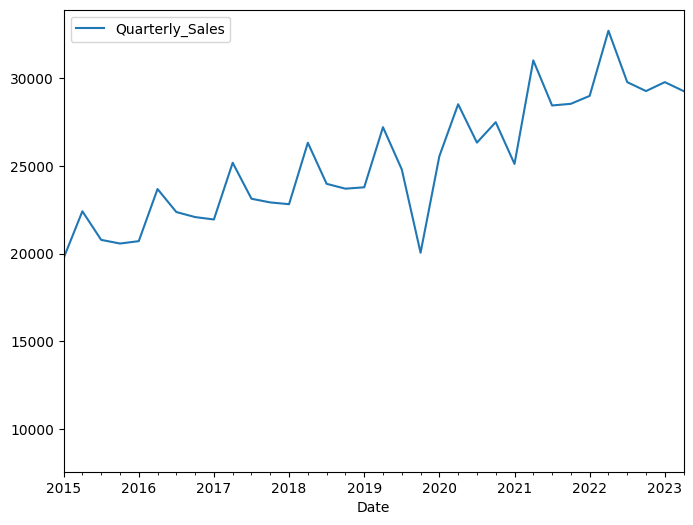

In [48]:
df2.plot(figsize=(8,6),xlim=['2015-03-31','2023-06-30'])
# Note the drop down during beginning of pandemia

In [49]:
# Explore the data
df2.describe()

,Quarterly_Sales
count,114.000000
mean,17307.978070
std,6300.250558
min,8781.800000
25%,11711.675000
50%,16448.850000
75%,21819.550000
max,32689.400000


In [50]:
# df2.plot(figsize=(18,6))

In [51]:
df2.index

DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30', '1996-09-30', '1996-12-31',
               '1997-03-31', '1997-06-30',
               ...
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=114, freq='Q-DEC')

### IDENTIFYING SEASONAL PATTERNS

Time series decomposition: Time series decomposition is a statistical process that breaks down a time series into three key components: trend, seasonal, and residuals. The trend component signifies the long-term change in the time series, capturing overall increases or decreases. The seasonal component represents periodic patterns, reflecting recurring fluctuations over a fixed time period. Residuals, or noise, account for irregularities unexplained by the trend or seasonal components.

The retail sales time series exhibits a clear upward trend and significant seasonality with peaks during the second quarter of the year.

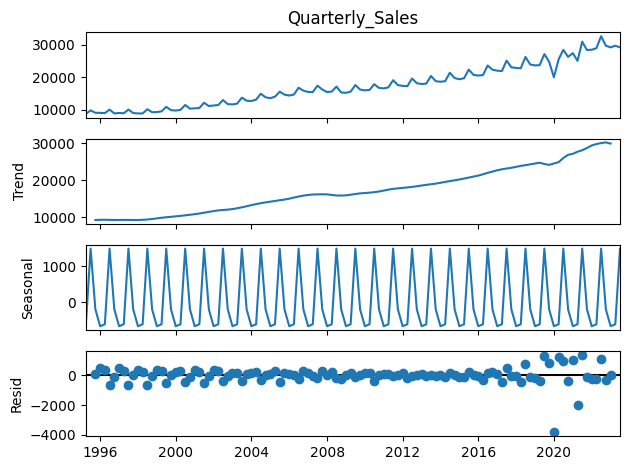

In [52]:
# ets decomposition (error, trend, seassonality)
ets_decomposition = seasonal_decompose(df2['Quarterly_Sales'], model='add')
ets_decomposition.plot();

The time serie shows a clear seasonal pattern

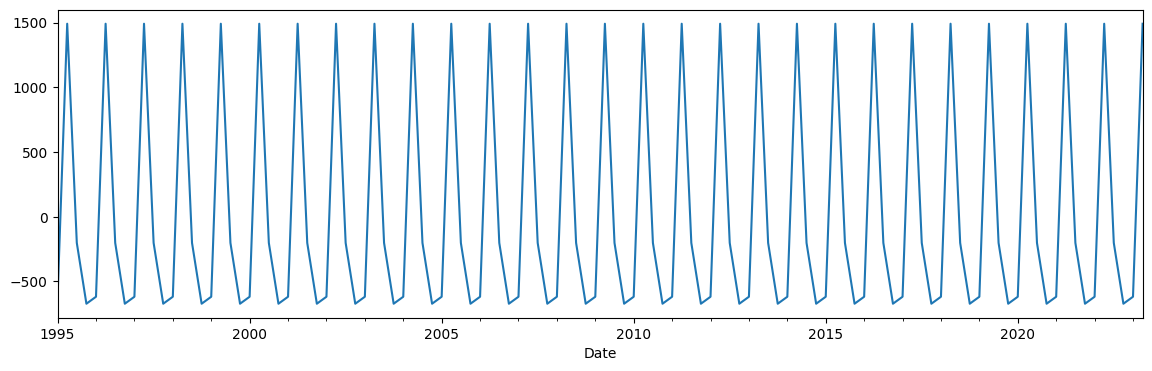

In [53]:
# Seasonal pattern
ets_decomposition.seasonal.plot(figsize=(14,4));

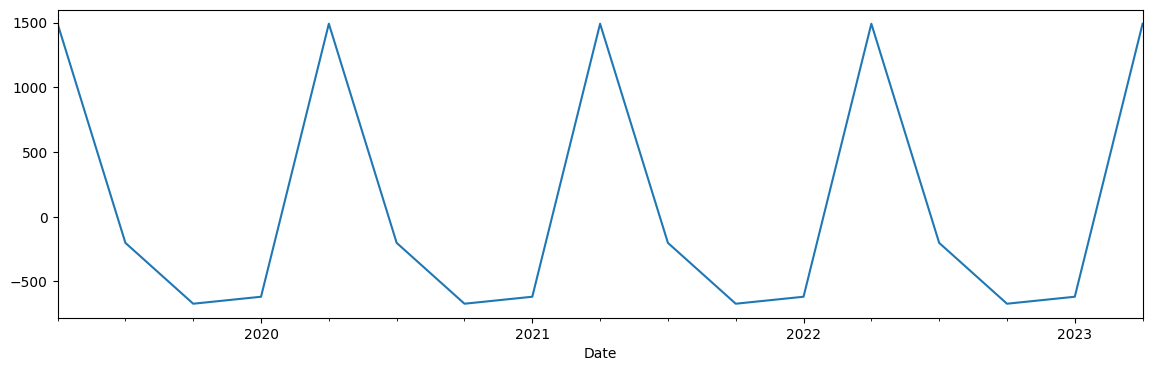

In [54]:
# Seasonal pattern
ets_decomposition.seasonal.plot(figsize=(14,4),xlim=['2019-06-30','2023-06-30']);

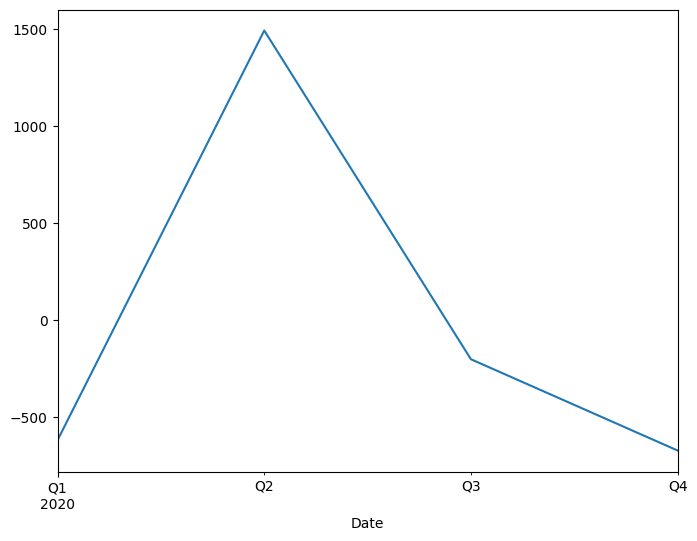

In [55]:
# Seasonal pattern
ets_decomposition.seasonal.plot(figsize=(8,6),xlim=['2020-03-31','2020-12-31']);


Take a closer look at the chart by zooming in to better understand the patterns in the time series data.

In [56]:
# Interactive plot with plotly
# import plotly.express as px

fig = px.line(df2, y='Quarterly_Sales')
fig.show()

In [57]:
# @

## BASELINE MODEL

Section description: in this section we build a baseline model.

In time series forecasting, the establishment of a straightforward baseline model is deemed important, providing a starting point for subsequent models evaluation and comparison.
In this scenario, 2021 quarterly sales are used as predictions for 2022.

In [58]:
# For simplicity, we define  a data frame up to and including 2022 which is the last year with full data( 4 quarters).
df3 = df2[:-2].copy()

In [59]:
df3.tail()

,Quarterly_Sales
Date,
2021-12-31,28529.4
2022-03-31,28980.2
2022-06-30,32689.4
2022-09-30,29762.7
2022-12-31,29253.9


In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 1995-03-31 to 2022-12-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Quarterly_Sales  112 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


### PREDICTIONS

In [61]:
baseline_predictions = df3['Quarterly_Sales'][-8:-4].values

In [62]:
baseline_predictions

array([25107.3, 31001.5, 28434.3, 28529.4])

In [63]:
index_2022 = pd.date_range(start='2022-01-01', periods=4, freq='Q-DEC')

In [64]:
index_2022

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [65]:
baseline_pred22 = pd.Series(baseline_predictions, index=index_2022, name='Baseline_predictions')

In [66]:
baseline_pred22

2022-03-31    25107.3
2022-06-30    31001.5
2022-09-30    28434.3
2022-12-31    28529.4
Freq: Q-DEC, Name: Baseline_predictions, dtype: float64

<Axes: xlabel='Date'>

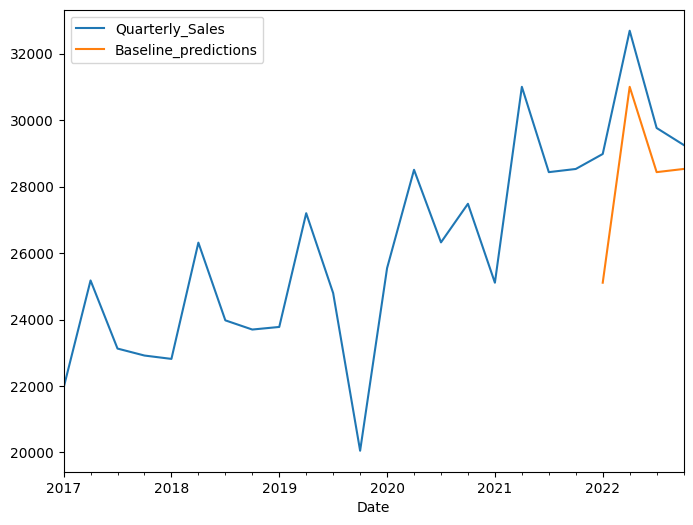

In [67]:
df3.iloc[88:].plot(figsize=(8,6))
baseline_pred22.plot(legend=True)

### MAPE

Mean Absolute Percentage Error(MAPE): MAPE is a metric to measure the accuracy of forecasting methods by expressing, in percentage terms, the average deviation of forecasted values from actual values. It considers whether predictions were higher or lower than observed values.

MAPE =  np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
# MAPE
baseline_comparison = df3[-4:].copy()

In [69]:
baseline_comparison['Baseline_pred'] = baseline_pred22

In [70]:
baseline_comparison

,Quarterly_Sales,Baseline_pred
Date,,
2022-03-31,28980.2,25107.3
2022-06-30,32689.4,31001.5
2022-09-30,29762.7,28434.3
2022-12-31,29253.9,28529.4


In [71]:
mape_baseline = np.mean(np.abs((baseline_comparison['Quarterly_Sales'] - baseline_comparison['Baseline_pred']) / baseline_comparison['Quarterly_Sales'])) * 100

In [72]:
mape_baseline

6.366824255756528

In [73]:
# MAPE of 6.36% means that the baseline model predictions deviates by 6.36% on average from the observed quarterly data

## SARIMA MODEL

Section description: in this section we build a SARIMA model.

The Seasonal Autoregressive Integrated Moving Average (SARIMA) model is a time series forecasting method. It extends the ARIMA model to account for seasonality in the data. The key components are:

Seasonal Component (S): Represents the repeating patterns in the data over a specific time span.

Autoregressive Component (AR): Captures the relationship between an observation and several lagged observations in both the original time series and the seasonal differenced series.

Integrated Component (I): Denotes the number of differences needed to make the time series stationary, making it suitable for modeling.

Moving Average Component (MA): Incorporates the weighted average of past forecast errors to predict future values.

The SARIMA model is defined by three sets of parameters: (p, d, q) for the non-seasonal part, (P, D, Q, s) for the seasonal part, and the seasonality period (s). The non-seasonal parameters p, d, q correspond to the AR order, differencing order, and MA order, respectively. The seasonal parameters P, D, Q represent the seasonal AR order, seasonal differencing order, and seasonal MA order, while s is the seasonality period.

### ADF TEST

The Augmented Dickey-Fuller (ADF) test is a statistical tool used in time series analysis to assess whether a given time series has a unit root, which implies non-stationarity. Non-stationary time series have a mean or variance that changes over time, making predictions challenging. The ADF test helps determine if differencing is necessary to achieve stationarity.

The test produces a test statistic and critical values. If the test statistic is less than the critical value (usually 0.05) it is indicating stationarity. Conversely, if the test statistic is greater than the critical value, it is indicating non-stationarity.

Stationarity: A stationary time series maintains constant statistical properties (mean, variance, and autocorrelation) independent of time. Many forecasting models rely on stationarity, and using them assumes verified stationarity in the data. Non-stationary data implies changing properties over time, rendering models invalid and forecasts unreliable. This is because model parameters would need to adapt continuously to evolving data, making it impossible to derive a consistent function for forecasting based on past values.New section

Differencing: Differencing is a technique used to address non-stationarity in time series data. It involves calculating the difference between consecutive observations. By doing this, trends and seasonality in the data are removed, making the series more stationary. Essentially, differencing helps stabilize the mean and other statistical properties, allowing for more accurate and reliable modeling.

In [74]:
# First order differencing
first_diff = np.diff(df2['Quarterly_Sales'], n=1)

In [75]:
# ADF test
adfuller(first_diff)[1]

0.2106881175167707

The serie is still non-stationary (p-value is > 0.05), this time we aplly seasonal differencing.

In [76]:
# First order seasonal differencing
first_diff_seas = np.diff(first_diff, n=4)

With a significance level of 0.05 used as a threshold, the p-value of 1.0658391421819272e-17 is essentially zero
indicating that the time series is now stationary

In [77]:
# ADF test
adfuller(first_diff_seas)[1]

1.0658391421819272e-17

After one round differencing (d = 1) and one round seasonal differencing (D = 1), the order of the parameters d and D of the sarima model was obtained.  SARIMA (p, 1, q)(P, 1, Q, s)

### TRAIN AND TEST SETS

In [78]:
# Define the train set

In [79]:
# @

In [80]:
# For simplicity, a data frame up to and including 2022 is defined below.
df3 = df2[:-2].copy()

In [81]:
df3.index

DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30', '1996-09-30', '1996-12-31',
               '1997-03-31', '1997-06-30',
               ...
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
               '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=112, freq='Q-DEC')

In [82]:
# Set the train data set excluding the last year
train = df3['Quarterly_Sales'][:-4]

In [83]:
train

Date
1995-03-31     8781.8
1995-06-30     9843.1
1995-09-30     9110.1
1995-12-31     9095.0
1996-03-31     9015.4
               ...   
2020-12-31    27482.0
2021-03-31    25107.3
2021-06-30    31001.5
2021-09-30    28434.3
2021-12-31    28529.4
Freq: Q-DEC, Name: Quarterly_Sales, Length: 108, dtype: float64

In [84]:
len(train)

108

In [85]:
# Set the test data to be the last completed year of data
test = df3['Quarterly_Sales'][-4:]

In [86]:
test

Date
2022-03-31    28980.2
2022-06-30    32689.4
2022-09-30    29762.7
2022-12-31    29253.9
Freq: Q-DEC, Name: Quarterly_Sales, dtype: float64

In [87]:
len(test)

4

In [88]:
# type(train)

### OPTIMIZE SARIMA FUNCTION

Section description: in this section we define a function to try the many orders combinations a model could take and search for the best model based on AIC.

**AIC**: Akaike Information Criterion (AIC) is a measure used to compare different statistical models. Its purpose is to help choose the model that best balances accuracy and simplicity. In simpler terms, AIC considers how well a model fits the data while penalizing for complexity.
A lower AIC value indicates a better-fitting and more parsimonious model. So, when comparing models, the one with the lowest AIC is generally preferred.

In [89]:
# Create varibles with the possible values (0,1,2,3) for the orders p,q,P,Q
ps = range(0,4,1)
qs = range(0,4,1)
Ps = range(0,4,1)
Qs = range(0,4,1)

In [90]:
# Create a list with the tuples of all the possible combinations for p,q,P,Q
SARIMA_order_list = list(product(ps,qs,Ps,Qs))

In [91]:
# @

In [92]:
# Define a function to combine the parameters and find the best model (lowest AIC)
def optimize_SARIMA(train_set: pd.Series, order_list: list, d:int, D: int, s: int) -> pd.DataFrame:

  # Define a variable to store results
  results = []

  # Loop through different combination the model could try
  # tqdm creates a progress bar that visually displays how far along a process has advanced
  for order in tqdm(order_list):
    try:
      model = SARIMAX(train_set,order=(order[0], d, order[1]),seasonal_order=(order[2], D, order[3], s),simple_differencing=False).fit(disp=False)
    except:
      continue
    # Get the AIC and add it to the list
    aic = model.aic
    results.append([order, aic])
  # Create a dataframe with the resul list
  result_df = pd.DataFrame(results)
  result_df.columns = ['(p,q,P,Q)', 'AIC']

  # Sort in ascending order, lower AIC is better
  result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True)
  return result_df



### RUN OPTIMIZED FUNCTION

In [93]:
# def optimize_SARIMA(train_set: pd.Series, order_list: list, d:int, D: int, s: int) -> pd.DataFrame:
df_result = optimize_SARIMA(train,SARIMA_order_list,1,1,4) # 1,1,4

  0%|          | 0/256 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: Use

In [94]:
# SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12),simple_differencing=False).fit(disp=False)

In [95]:
# Ranking of best 10 models based on AIC
df_result.head(10)

,"(p,q,P,Q)",AIC
0,"(2, 3, 0, 1)",1666.144619
1,"(3, 3, 0, 1)",1667.318707
2,"(2, 1, 0, 1)",1668.214780
3,"(2, 1, 0, 3)",1668.216861
4,"(2, 3, 1, 1)",1668.412336
5,"(2, 1, 3, 0)",1668.986935
6,"(2, 3, 0, 3)",1669.189765
7,"(2, 1, 2, 2)",1669.210635
8,"(2, 2, 0, 3)",1669.674932
9,"(2, 3, 1, 2)",1669.715807


In [96]:
# Model with lowest AIC
SARIMA_model_1 = SARIMAX(train, order=(2,1,3), seasonal_order=(0,1,1,4),simple_differencing=False).fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [97]:
SARIMA_model_1.aic

1666.1446191009848

### RESIDUAL ANALYSIS

If a time series model has successfully captured all the predictable patterns, what's left (the residuals) should ideally resemble white noise.

**White Noise**: is a sequence of random numbers where each number is entirely unrelated to the others and have a normal distribution.

The assessment of normal distribution in residuals is conducted through the utilization of a Q-Q plot. Furthermore, the determination of the presence of correlation in model residuals is achieved by employing the Ljung-Box test.

**Q-Q plot**:  Q-Q plot compares the distribution of residuals from a statistical model to what we would expect if the residuals were normally distributed. If the points on the plot form a roughly straight line, it suggests that the residuals are approximately normally distributed

**Ljung-Box test**: The Ljung-Box test is a statistical test that helps evaluate whether there is any significant pattern or correlation in the residuals of a time series model. If the p value is > 0.05, it indicates independence in the residuals, therefore the model is suitable for making predictions. A p value <0.05 indicates correlated residuals, making the model unsuitable for forecasting.

Model 1

Residuals analysis through graphics:

The top-right plot shows a histogram of the residuals with a distribution similar to a normal distribution.

At the bottom left The Q-Q plot shows the residuals also describing a normal distribution.

At the bottom-right plot shows the autocorrelation function of the residuals. There is only a significant peak at lag 0, this means that the residuals are not correlated.

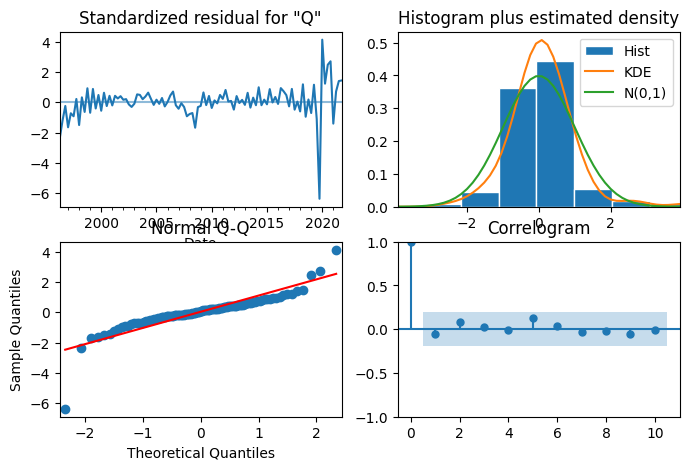

In [98]:
SARIMA_model_1.plot_diagnostics(figsize=(8,5));

Model 1

L-jung box test: All residuals at lag 10 for model_1 are < 0.05 this means the residuals have some autocorrelation. This means there is still some predictable patterns that the model doesn't catch yet.

In [99]:
# Ljung-Box test
# from statsmodels.stats.diagnostic import acorr_ljungbox

In [100]:
residuals1 = SARIMA_model_1.resid

In [101]:
# p-value < 0.05 there are correlation between errors, so the model has not captured all predictive information
acorr_ljungbox(residuals1, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,7.545310,0.006017
2,7.956955,0.018714
3,9.403944,0.024375
4,15.773831,0.003338
5,16.498927,0.005555
6,16.550594,0.011085
7,16.772894,0.018921
8,17.190466,0.028186
9,17.656607,0.039373
10,17.744934,0.059422


Model 2

Exploring different orders combinations, this model (model 2) perform worst on the AIC, but better on the Ljung-box test as we will see later.


In [102]:
# Model
SARIMA_model_2 = SARIMAX(train, order=(1,1,0), seasonal_order=(2,1,2,4),simple_differencing=False).fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [103]:
SARIMA_model_2.aic

1677.087807620694

Model 2

Residuals analysis through graphics:

The top-right plot shows a histogram of the residuals with a distribution similar to a normal distribution.

At the bottom left The Q-Q plot shows the residuals on model 2, describing a normal distribution. However, the residuals fit worse to a normal distribution if we compare the residuals from model 1.

At the bottom-right plot shows the autocorrelation function of the residuals. There is a significant peak at lag 0, and at lag 5 this means that the residuals shows some correlation.

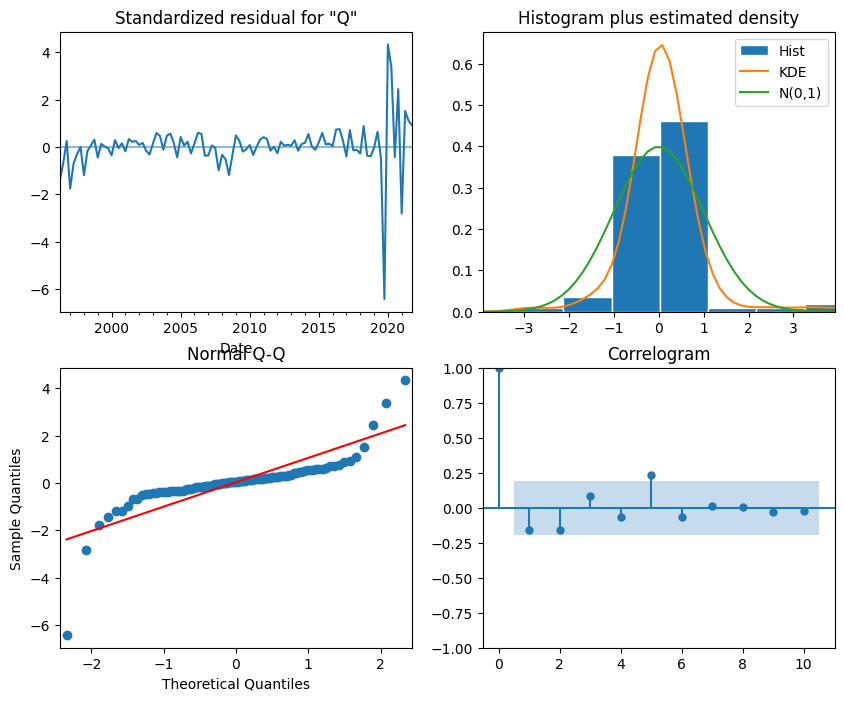

In [104]:
SARIMA_model_2.plot_diagnostics(figsize=(10,8));

Model 2

L-jung box test: All residuals at lag 10 for model_2 are > 0.05 this means they are independient, no autocorrelated.

In [105]:
residuals_2 = SARIMA_model_2.resid

In [106]:
# All residuals lag 10 for model_2 are > 0.05 so they are independient, no autocorrelated
acorr_ljungbox(residuals_2, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,2.076887,0.149545
2,2.411562,0.299458
3,3.034435,0.386346
4,9.258378,0.054956
5,9.332226,0.096524
6,9.503003,0.147203
7,9.503081,0.218525
8,9.913155,0.271174
9,10.088136,0.343397
10,10.141709,0.428150


### PREDICTIONS

In [107]:
start = len(train)

In [108]:
end = len(train) + len(test) -1

In [109]:
end

111

In [110]:
predictions_1 = SARIMA_model_1.predict(start,end).rename('MODEL 1 (2,1,3),(0,1,1,4)') # order=(2,1,3), seasonal_order=(0,1,1,4)

In [111]:
predictions_2 = SARIMA_model_2.predict(start,end).rename('MODEL 2 (1,1,0),(2,1,2,4)') # order=(1,1,0), seasonal_order=(2,1,2,4)

In [112]:
# test

In [113]:
# predictions_1

In [114]:
# predictions_2

The following graph shows how model's 2 the predictions  fits the test data slightly better than model's 1 predictions

<Axes: xlabel='Date'>

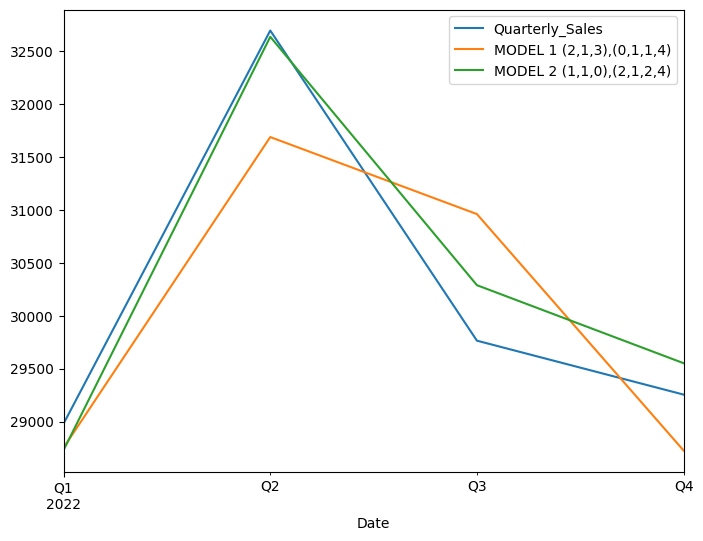

In [115]:
test.plot(legend=True, figsize=(8,6))
predictions_1.plot(legend=True)
predictions_2.plot(legend=True)

### MAPE

MAPE confirms what we saw in the previous plot, model 1 has a slightly worse performance compared to model 2.

The average deviation of predictedted values from test values are 2.41% (model 1) and 0.95% (model 2)

In [116]:
mape_sarima_1 = np.mean(np.abs((test - predictions_1) / test)) * 100
mape_sarima_1

2.4192693688975533

In [117]:
mape_sarima_2 = np.mean(np.abs((test - predictions_2) / test)) * 100
mape_sarima_2

0.9535813395426895

### FORECAST INTO THE FUTURE

In [118]:
# Retrain the models with the hole data of completed years (2022-12-31)

In [119]:
# Model with lowest AIC
SARIMA_1 = SARIMAX(df3['Quarterly_Sales'], order=(2,1,3), seasonal_order=(0,1,1,4),simple_differencing=False).fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [120]:
forecast_1 = SARIMA_1.predict(len(df3),len(df3)+7).rename('SARIMA 1 FCAST')

In [121]:
forecast_1

2023-03-31    29988.831650
2023-06-30    33562.738838
2023-09-30    31400.967130
2023-12-31    30678.217224
2024-03-31    31398.013282
2024-06-30    34939.963160
2024-09-30    32749.480281
2024-12-31    32113.159756
Freq: Q-DEC, Name: SARIMA 1 FCAST, dtype: float64

In [122]:
len(df3)

112

In [123]:
# Model better performing at Ljung-box test
SARIMA_2 = SARIMAX(df3['Quarterly_Sales'], order=(1,1,0), seasonal_order=(2,1,2,4),simple_differencing=False).fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [124]:
forecast_2 = SARIMA_2.predict(len(df3),len(df3)+7).rename('SARIMA 2 FCAST') # +5 o +7 serian 6 o 8 trimestres????

In [125]:
forecast_2

2023-03-31    29625.740579
2023-06-30    33953.167799
2023-09-30    31396.182525
2023-12-31    30768.624461
2024-03-31    31263.360993
2024-06-30    35605.380237
2024-09-30    32926.355089
2024-12-31    32283.066725
Freq: Q-DEC, Name: SARIMA 2 FCAST, dtype: float64

<Axes: xlabel='Date'>

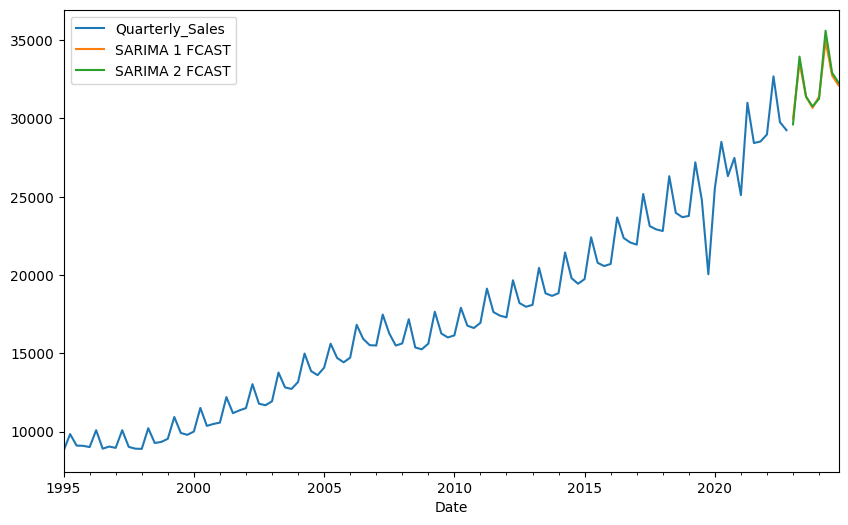

In [126]:
df3.plot(legend=True, figsize=(10,6))
forecast_1.plot(legend=True)
forecast_2.plot(legend=True)

In [127]:
df3.iloc[95]

Quarterly_Sales    23698.0
Name: 2018-12-31 00:00:00, dtype: float64

<Axes: xlabel='Date'>

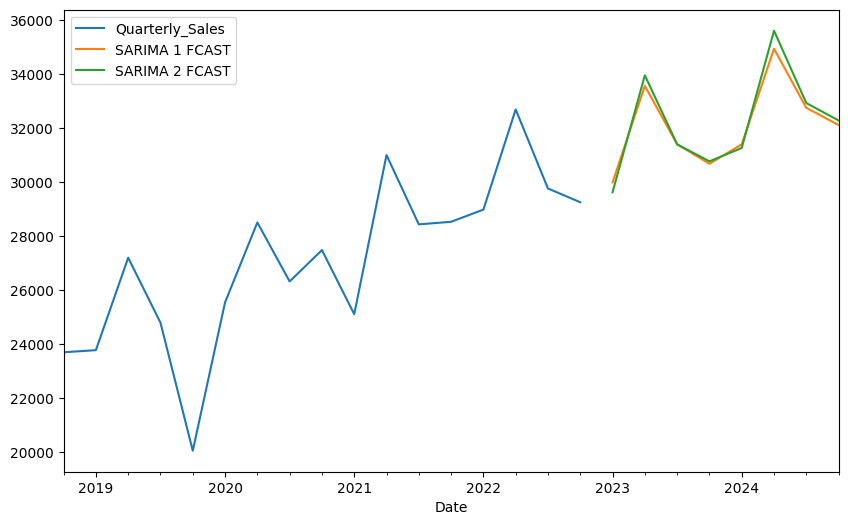

In [128]:
df3.iloc[95:].plot(legend=True, figsize=(10,6))
forecast_1.plot(legend=True)
forecast_2.plot(legend=True)

<Axes: xlabel='Date'>

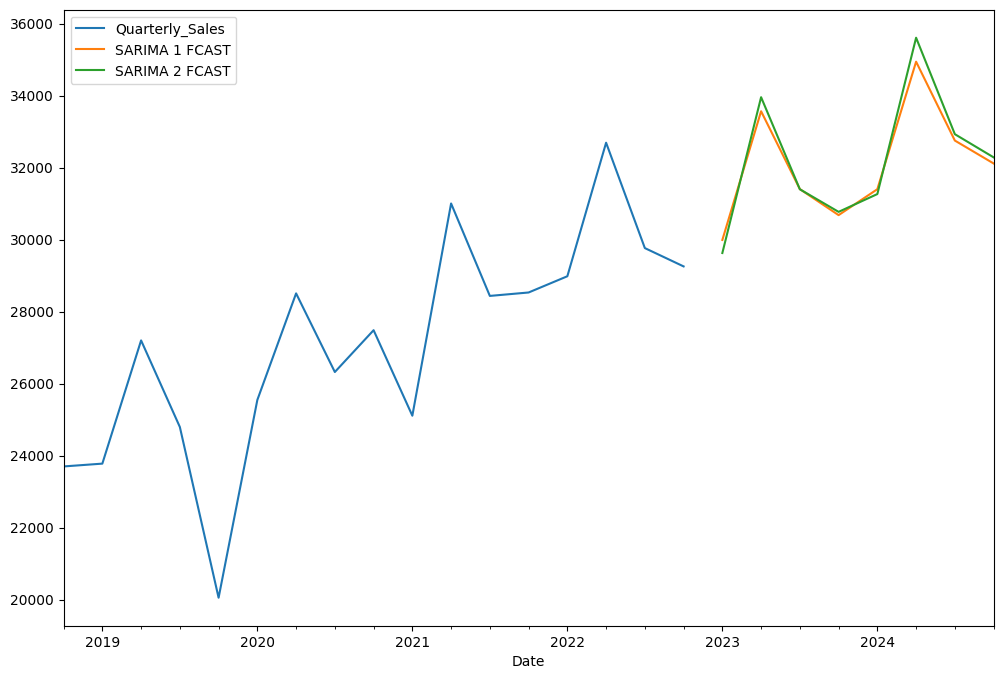

In [129]:
df3.iloc[95:].plot(legend=True, figsize=(12,8))
forecast_1.plot(legend=True)
forecast_2.plot(legend=True)

Conclusion

Even though there are some inconsistencies regarding the model's residuals evaluation, model 1 does well in the graphical analysis and poorly in the L-jung box test and model 2 does the opposite, we can conclude that the MAPE is relatively low and the forecasts of each model are very similar to each other.

######################################

In [130]:
@

SyntaxError: ignored

# LSTM RNN MODEL

Section description: in this section we build a LSTM model.

**LSTM**: LSTM (Long Short-Term Memory Recurrent Neural Network)is a type of recurrent neural network (RNN) designed to overcome the vanishing gradient problem in traditional RNNs. It is capable of learning and remembering long-term dependencies in sequential data, making it well-suited for tasks such as time series prediction, natural language processing, and other applications involving sequential patterns. LSTM networks use memory cells and gates to control the flow of information, allowing them to capture and retain important information over extended sequences.

## IMPORT LIBRARIES

Section description: in this section we import the main libraries needed

In [131]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

## TRAIN AND TEST SETS

In [132]:
df3


,Quarterly_Sales
Date,
1995-03-31,8781.8
1995-06-30,9843.1
1995-09-30,9110.1
1995-12-31,9095.0
1996-03-31,9015.4
...,...
2021-12-31,28529.4
2022-03-31,28980.2
2022-06-30,32689.4


In [133]:
# Create train set excluding the last year

train_2 = df3['Quarterly_Sales'][:-4] # untill a hole year

In [134]:
len(train_2)

108

In [135]:
train_2.head(4)

Date
1995-03-31    8781.8
1995-06-30    9843.1
1995-09-30    9110.1
1995-12-31    9095.0
Freq: Q-DEC, Name: Quarterly_Sales, dtype: float64

In [136]:
train_2.tail(4)

Date
2021-03-31    25107.3
2021-06-30    31001.5
2021-09-30    28434.3
2021-12-31    28529.4
Freq: Q-DEC, Name: Quarterly_Sales, dtype: float64

In [137]:
# Define the test set to be the last completed year of data

test_2 = df3['Quarterly_Sales'][-4:]

In [138]:
len(test_2)

4

In [139]:
test_2.tail()

Date
2022-03-31    28980.2
2022-06-30    32689.4
2022-09-30    29762.7
2022-12-31    29253.9
Freq: Q-DEC, Name: Quarterly_Sales, dtype: float64

In [140]:
# Reshape the data to match with the LSTM requirement
train_reshaped = train_2.values.reshape(-1, 1)

In [141]:
# train_reshaped

In [142]:
# @

## SCALE THE DATA

Scaling data improves performance and speeds up training.

In [143]:
scaler = MinMaxScaler()

In [144]:
scaler.fit(train_reshaped)

MinMaxScaler()

In [145]:
scaled_train = scaler.transform(train_reshaped)

In [146]:
# scaled_test = scaler.transform(test_reshaped)

## DATA WINDOWING

**Data Windowing**: LSTM models develops its own predictive function by processing input sequences to generate optimal predictions. This is achieved through data windowing, where we organize a sequence of data points or time steps in our time series, designating some as inputs and others as labels. This enables the deep learning model to learn from the inputs, make predictions, compare them to the labels, and iteratively refine its accuracy until further improvement is not possible.

**n_input**: is the time steps used as training sequence, how much to lookback before one prediction. The lookback generally depends on the seasonality of the data. In this case the network grab 4 history step of the train data, and predict the next timestep.
The last 4 points of the train data are used to predict the first point on the test set.

**n_features**: In this scenario it refers to the label or target, quarterly retail sales.


In [147]:
# Train sequence
n_input = 4
n_features = 1

The TimeseriesGenerator produce the sequence of data used for training,

In [148]:
# The TimeseriesGenerator produce the sequence of data used for training.
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

## BUILDING THE MODEL

**Sequential**: Sequential is the structure of the model. It allows for linearly stacking layers on top of each other, defining a feedforward neural network architecture.

**LSTM**: The network has one LSTM layer with 256 memory units, and another with 128 memory units.

**activation='relu'**: The rectified linear unit (ReLU) activation function is used to introduce non-linearity.

**input_shape=(n_input, n_features)**: Specifies the shape of the input data. n_input is the number of time steps, and n_features is the number of features in each time step.

**return_sequences=True:** This parameter is set to true because there is another LSTM layer following it, and it needs to receive the entire sequence of outputs.
LSTM(128, activation='relu', input_shape=(n_input, n_features)):

**Dense(1, 'linear')**: The Dense layer is a fully connected layer. Each neuron in a dense layer is connected to every neuron in the previous layer. In this case it has only one neuron (or unit). This is common in regression tasks where the goal is to predict a single continuous value. The 'linear' activation is appropriate for regression problems, where the model is predicting a numerical value, and the goal is to minimize the mean squared error.

**optimizer = Adam(learning_rate=0.001)**: Adam is an optimization algorithm, and it is a popular choice due to its adaptive learning rate properties.

**model.compile(optimizer=optimizer, loss='mse', metrics=['MeanAbsoluteError'])**: This step compiles the model. It specifies the optimizer (Adam), the loss function ('mse' for mean squared error, suitable for regression), and metrics to evaluate during training ('MeanAbsoluteError' is used as a metric to monitor).

In [149]:
model = Sequential()


model.add(LSTM(256, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1,'linear'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['MeanAbsoluteError'])


In [150]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 461441 (1.76 MB)
Trainable params: 461441 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## FIT THE MODEL

**model.fit**: fit is a method used to train a model. It takes training data, labels, and other parameters to optimize the model's weights.

**train_generator**: Generators are the data source used for training the model. They efficiently load and process data in batches.

**epochs=50**: The epochs specifies the number of times the entire training dataset is passed forward and backward through the neural network.

**batch_size=1**: The batch_size defines the number of samples used in each iteration for updating the model weights.

In [151]:
model.fit(train_generator,epochs=50,batch_size=1)

Epoch 1/50
104/104 [==============================] - 4s 15ms/step - loss: 0.0516 - mean_absolute_error: 0.1397
Epoch 2/50
104/104 [==============================] - 2s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0561
Epoch 3/50
104/104 [==============================] - 2s 18ms/step - loss: 0.0034 - mean_absolute_error: 0.0435
Epoch 4/50
104/104 [==============================] - 2s 24ms/step - loss: 0.0059 - mean_absolute_error: 0.0566
Epoch 5/50
104/104 [==============================] - 2s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0487
Epoch 6/50
104/104 [==============================] - 2s 20ms/step - loss: 0.0030 - mean_absolute_error: 0.0396
Epoch 7/50
104/104 [==============================] - 3s 28ms/step - loss: 0.0054 - mean_absolute_error: 0.0555
Epoch 8/50
104/104 [==============================] - 3s 28ms/step - loss: 0.0045 - mean_absolute_error: 0.0477
Epoch 9/50
104/104 [==============================] - 3s 32ms/step - loss: 0.0033 - mean_absolute_error:

During training, the optimizer adjusts the model's weights to minimize the mse loss function. Let's plot the loss function to see its behavior.

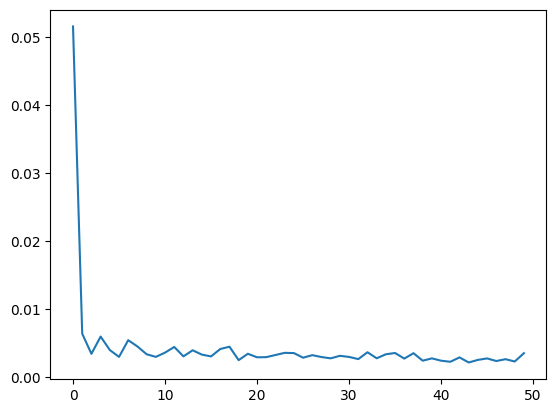

In [152]:
# Model loss function
model_loss = model.history.history['loss']
plt.plot(range(len(model_loss)),model_loss)

## PREDICTIONS

Once we observed a decreasing and converging loss during training, we can predict some values to compare with the unseen data on the test set.

In [153]:
# A list to store predictions
test_predictions = []

# Last n_input points from from the training set
first_eval_batch = scaled_train[-n_input:]

# Reshape to same format RNN and the TimesGenerator need
current_batch = first_eval_batch.reshape((1,n_input,n_features))


# How far into the future the model forecast?
# In this case the model predict the n_input(4) values of the test set

for i in range(len(test_2)):

  # One timestep ahead of historical n_inputs points
  current_pred = model.predict(current_batch)[0]

  # Store the prediction
  test_predictions.append(current_pred)


  # Update current_batch to include the prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


  # The current_batch[:,1:,:] means that on a 3 dimension array (in this example is (1,4,1)) take everything from the first dimention,
  # take everything but not the first point on the second dimention, and take everything from the third dimention
  # [[current_pred]] is with double [] to match the format
  # axis=1 is the axis where the data is on the array (1,4,1)
  #                                                   (0, 1, 2)


1/1 [==============================] - 0s 21ms/step


In [154]:
len(test_predictions)

4

In [155]:
# Inverse predictions to have it on the original scale
true_predictions = scaler.inverse_transform(test_predictions)

In [156]:
true_predictions

array([[27366.48096095],
       [29875.01928641],
       [28620.42034875],
       [28675.00008693]])

<Axes: xlabel='Date'>

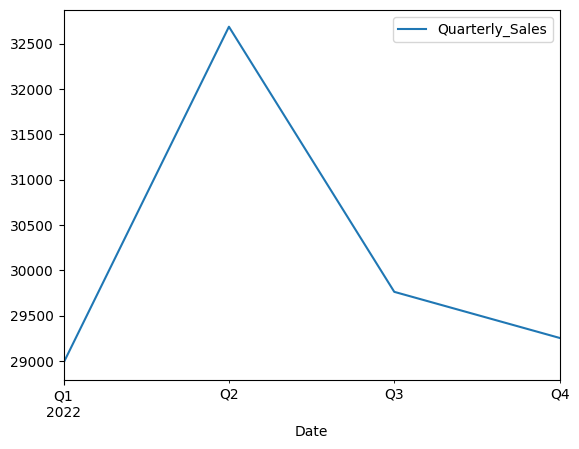

In [157]:
# Aplot of the year 2022
test_2022 = df3.iloc[-4:].copy()
test_2022.plot()

In [158]:
test_2022

,Quarterly_Sales
Date,
2022-03-31,28980.2
2022-06-30,32689.4
2022-09-30,29762.7
2022-12-31,29253.9


In [159]:
# test_2022 = test_2022.to_frame()

In [160]:
test_2022['Predictions LSTM'] = true_predictions

In [161]:
test_2022

,Quarterly_Sales,Predictions LSTM
Date,,
2022-03-31,28980.2,27366.480961
2022-06-30,32689.4,29875.019286
2022-09-30,29762.7,28620.420349
2022-12-31,29253.9,28675.000087


As we can see in the following plot, the model makes good predictions in quarters 1 and 2. However, it overestimates the values for quarters 3 and 4.

<Axes: xlabel='Date'>

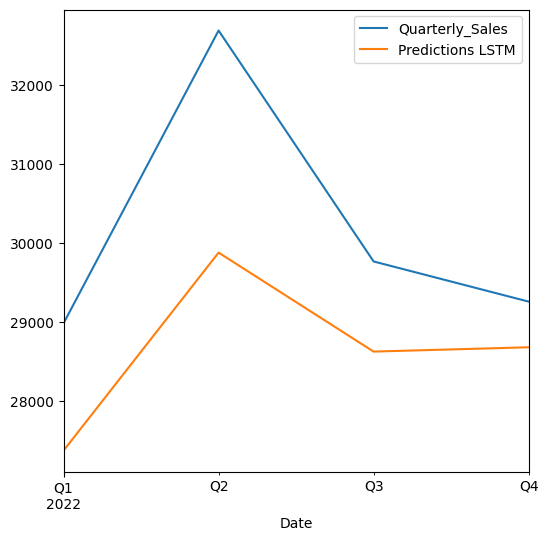

In [162]:
test_2022.plot(figsize=(6,6))

## MAPE

MAPE LSTM model: Average deviation of predictedted values from test values.

In [163]:
mape_lstm = np.mean(np.abs((test_2022['Quarterly_Sales'] - test_2022['Predictions LSTM']) / test_2022['Quarterly_Sales'])) * 100
mape_lstm

4.998662040430102

In [164]:
df3_plot=df3['2018-03-31':"2022-12-31"]

<Axes: xlabel='Date'>

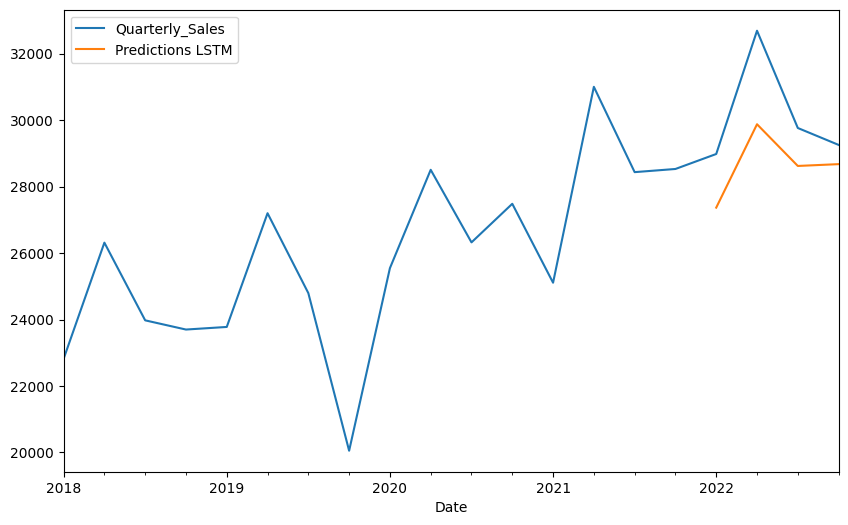

In [165]:
df3_plot.plot(figsize=(10,6))
test_2022['Predictions LSTM'].plot(legend=True)

## FORECAST INTO THE FUTURE

In this section we forecast 8 periods forward, which would generate values for the years 2023 and 2024.

In [166]:
# Re-train the model with all data available considering complete years (untill 2022)
train_2 = df3['Quarterly_Sales']

# Reshape the data
train_reshaped = train_2.values.reshape(-1, 1)

# Scale the data
scaler.fit(train_reshaped)
scaled_train = scaler.transform(train_reshaped)

# Create data sequences or time steps
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [167]:
# Set the model's layers
model = Sequential()

model.add(LSTM(256, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['MeanAbsoluteError'])

In [168]:
model.fit(train_generator,epochs=50,batch_size=1)

Epoch 1/50
108/108 [==============================] - 6s 16ms/step - loss: 0.0288 - mean_absolute_error: 0.1171
Epoch 2/50
108/108 [==============================] - 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0448
Epoch 3/50
108/108 [==============================] - 2s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0571
Epoch 4/50
108/108 [==============================] - 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0443
Epoch 5/50
108/108 [==============================] - 2s 16ms/step - loss: 0.0039 - mean_absolute_error: 0.0459
Epoch 6/50
108/108 [==============================] - 3s 23ms/step - loss: 0.0035 - mean_absolute_error: 0.0446
Epoch 7/50
108/108 [==============================] - 2s 17ms/step - loss: 0.0062 - mean_absolute_error: 0.0562
Epoch 8/50
108/108 [==============================] - 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0386
Epoch 9/50
108/108 [==============================] - 2s 15ms/step - loss: 0.0038 - mean_absolute_error:

In [169]:
# Generate predictions

# A list to store predictions
test_predictions = []

# Last n_input points from from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape to same format RNN and the TimesGenerator need
current_batch = first_eval_batch.reshape((1,n_input,n_features))


# How far into the future the model forecast?
# 8 times will generate predictions for 2023 and 2024
for i in range(8):

  # One timestep ahead of historical n_inputs points
  current_pred = model.predict(current_batch)[0]

  # Store the prediction
  test_predictions.append(current_pred)

  # Update current_batch to include the prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 22ms/step


In [170]:
# Inverse predictions to have it on the original scale
true_predictions = scaler.inverse_transform(test_predictions)

In [171]:
df3_plot=df3['2015-03-31':] # "2022-12-31"

In [172]:
# Create a Pandas Series with the forecasted values

# timestamps_2023_2024
timestamps_2023_2024 = ["2023-03-31", "2023-06-30", "2023-09-30", "2023-12-31","2024-03-31", "2024-06-30", "2024-09-30", "2024-12-31"]

# Convert quarterly timestamps to datetime objects
date_objects = pd.to_datetime(timestamps_2023_2024, format="%Y-%m-%d")

# Create a Pandas Series with the time and values
forecast_lstm = pd.Series(true_predictions.flatten(), index=date_objects, name='LSTM forecast')


In [173]:
forecast_lstm

2023-03-31    31147.035515
2023-06-30    32874.131819
2023-09-30    31391.047501
2023-12-31    31485.439766
2024-03-31    32750.906023
2024-06-30    33522.634042
2024-09-30    32888.094008
2024-12-31    33184.808343
Name: LSTM forecast, dtype: float64

The following graphs show the forecast values generated by the LSTM model for the 2023 and 2024 quarters.

<Axes: xlabel='Date'>

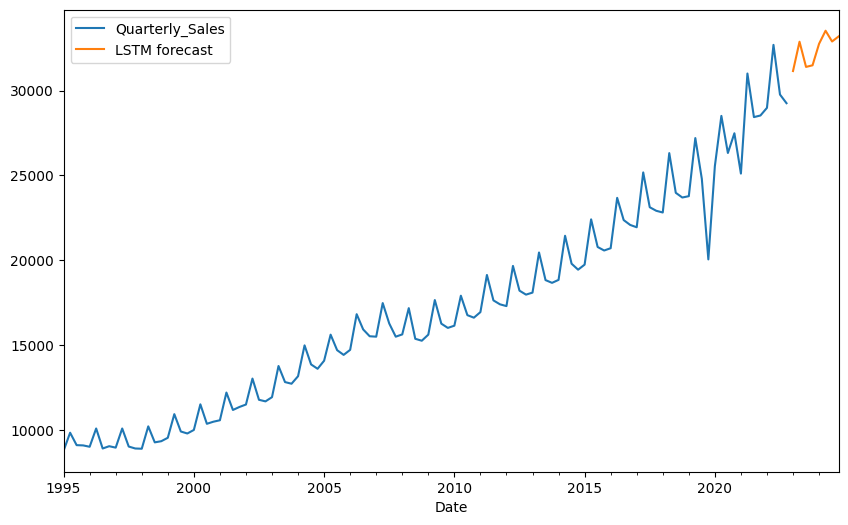

In [174]:
df3.plot(figsize=(10,6))
forecast_lstm.plot(legend=True,)

<Axes: xlabel='Date'>

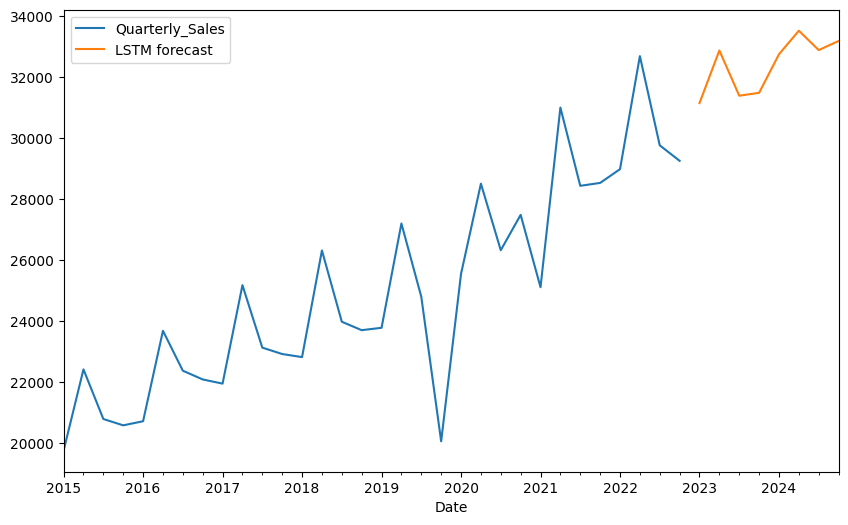

In [175]:
df3_plot.plot(figsize=(10,6))
forecast_lstm.plot(legend=True,)

# CONCLUSIONS

## MAPE COPARISON

(0.0, 15.0)

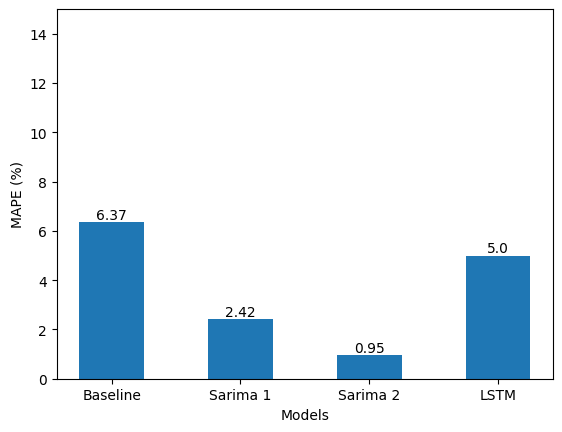

In [176]:
fig, ax = plt.subplots()
x = ['Baseline', 'Sarima 1','Sarima 2','LSTM']
y = [mape_baseline, mape_sarima_1, mape_sarima_2,mape_lstm]
bars = ax.bar(x, y, width=0.5)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

## PREDICTIONS

<Axes: xlabel='Date'>

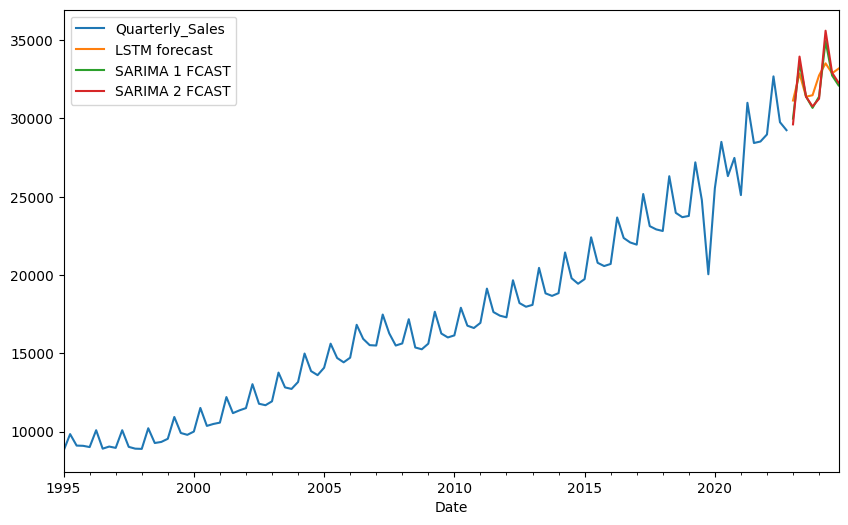

In [177]:
df2.iloc[:-2].plot(legend=True, figsize=(10,6))
forecast_lstm.plot(legend=True)
forecast_1.plot(legend=True)
forecast_2.plot(legend=True)

<Axes: xlabel='Date'>

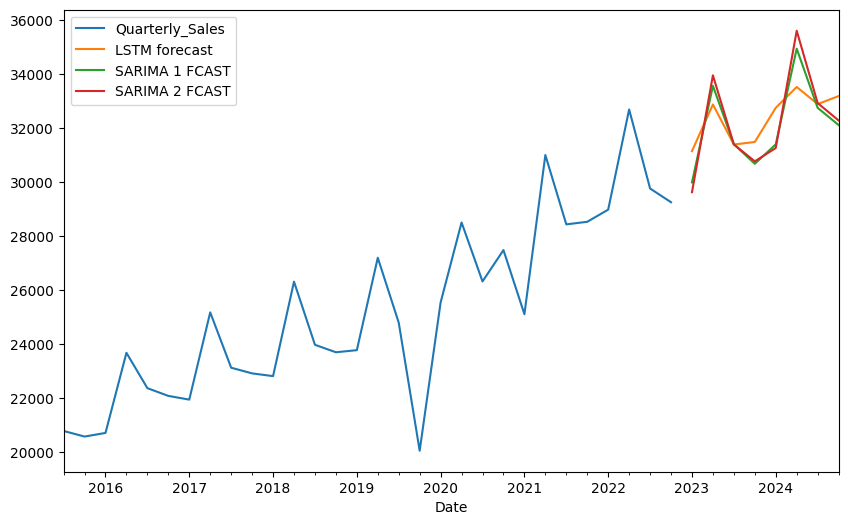

In [178]:
df2.iloc[82:-2].plot(legend=True, figsize=(10,6))
forecast_lstm.plot(legend=True)
forecast_1.plot(legend=True)
forecast_2.plot(legend=True)

Building a DataFrame with models predictions

In [179]:
forecast_lstm.index

DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31'],
              dtype='datetime64[ns]', freq=None)

In [180]:
forecast_lstm.index.freq = 'Q'

In [181]:
forecast_lstm.index

DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [182]:
models_pred = pd.DataFrame(forecast_1.round(decimals=2))

In [183]:
# models_pred

In [184]:
models_pred['SARIMA 2 FCAST'] = forecast_2.round(decimals=2)

In [185]:
models_pred['LSTM FCAST'] = forecast_lstm.round(decimals=2)

In [186]:
models_pred

,SARIMA 1 FCAST,SARIMA 2 FCAST,LSTM FCAST
2023-03-31,29988.83,29625.74,31147.04
2023-06-30,33562.74,33953.17,32874.13
2023-09-30,31400.97,31396.18,31391.05
2023-12-31,30678.22,30768.62,31485.44
2024-03-31,31398.01,31263.36,32750.91
2024-06-30,34939.96,35605.38,33522.63
2024-09-30,32749.48,32926.36,32888.09
2024-12-31,32113.16,32283.07,33184.81


## CONCLUSION
The results showed that SARIMA 2 was the most accurate, closely followed by SARIMA 1. Even though LSTM faced challenges with a  small dataset, it still gave us some useful predictions.  It is noteworthy that, even though LSTM might not be the optimal choice with fewer data points, its inclusion in the analysis served the purpose of experimentation, learning, and comparison.

In summary, the SARIMA models demonstrated superior performance in this context. However, incorporating LSTM into the analysis provided insights into its performance under less-than-ideal conditions. This comparative analysis enhances the understanding of model behavior based on the available data. Future adjustments and exploration of different models hold the potential to refine predictions, particularly when applied to more extensive datasets.

In [187]:
# Generate requirements.txt inside the virtual environment:
# !pip freeze > requirements.txt

In [188]:
# from google.colab import files
# files.download('requirements.txt')

In [189]:
# In your Colab notebook, include installation instructions:
# !pip install -r requirements.txt